# Introduction

In this project we have been provided a website which contains over 1700 reviews of chocolate bars from all around the world. And we are to utilize **BeautifulSoup** (a python library used for Web Scrapping) in such a way that we can answers the following questions like:
- How are ratings distributed?
- Which chocolatier (chocolate company) makes the best chocolate?
- Is more cacao better?

Source - [Codecademy Cocoa](https://content.codecademy.com/courses/beautifulsoup/cacao/index.html)

# Import Required Libraries

Let's start by importing the required libraries (including __BeautifulSoup__)

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [2]:
# Get Response
response = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

# Create BeautifulSoup object
soup = BeautifulSoup(response.content, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

We observe different classes and find that class:
- `Company` has company name
- `Origin` has Origin of Cocoa
- `REF` has (by some research) reference id for the user who gave the rating
- `ReviewDate` has year of review
- `CocoaPercent` has the percentage of cocoa present in the chocolate
- `CompanyLocation` has the country to which company of the chocoalte belongs
- `Rating` has rating between 1 and 5 (inclusive) where higher the rating means better
- `BeanType` has type of bean of cocoa
- `BroadBeanOrigin` has the country of the origin of bean

Let us get all these data into their respective the lists

In [3]:
# Company
company_name_tags = soup.find_all(attrs = {"class": "Company"})
company_names = []
for i in range(1, len(company_name_tags)):
    company_names.append(company_name_tags[i].get_text())

# Origin
cocoa_origin_tags = soup.find_all(attrs = {"class": "Origin"})
cocoa_origin = []
for i in range(1, len(cocoa_origin_tags)):
    cocoa_origin.append(cocoa_origin_tags[i].get_text())

# REF
ref_tags = soup.find_all(attrs = {"class": "REF"})
ref = []
for i in range(1, len(ref_tags)):
    ref.append(ref_tags[i].get_text())

# ReviewDate
review_year_tags = soup.find_all(attrs = {"class": "ReviewDate"})
review_year = []
for i in range(1, len(review_year_tags)):
    review_year.append(review_year_tags[i].get_text())

# CocoaPercent
cocoa_percent_tags = soup.find_all(attrs = {"class": "CocoaPercent"})
cocoa_percent = []
for i in range(1, len(cocoa_percent_tags)):
    cocoa_percent.append(float(cocoa_percent_tags[i].get_text().strip("%")))

#CompanyLocation    
company_country_tags = soup.find_all(attrs = {"class": "CompanyLocation"})
company_country = []
for i in range(1, len(company_country_tags)):
    company_country.append(company_country_tags[i].get_text())
    
# Rating
ratings_tags = soup.find_all(attrs = {"class": "Rating"})
ratings = []
for i in range(1, len(ratings_tags)):
    ratings.append(float(ratings_tags[i].get_text()))

# BeanType
bean_type_tags = soup.find_all(attrs = {"class": "BeanType"})
bean_type = []
for i in range(1, len(bean_type_tags)):
    bean_type.append(bean_type_tags[i].get_text())

# BroadBeanOrigin
bean_country_tags = soup.find_all(attrs = {"class": "BroadBeanOrigin"})
bean_country = []
for i in range(1, len(bean_country_tags)):
    bean_country.append(bean_country_tags[i].get_text())

In [4]:
# Creating a dictionary to convert it into pandas dataframe
dataframe_dict = {"CompanyName": company_names,
                  "CocoaOrigin": cocoa_origin,
                  "REF": ref,
                  "ReviewYear": review_year,
                  "CocoaPercentage": cocoa_percent,
                  "CompanyCountry": company_country,
                  "Rating": ratings,
                  "BeanType": bean_type,
                  "BeanCountry": bean_country}

df = pd.DataFrame.from_dict(dataframe_dict)

And now our scrapped data is ready in the form of a Pandas DataFrame. So, now type to perform __Exploratory Data Analysis__ starting with __Initial Data Inspection__ by printing first five rows observe the columns and data values to get an idea of what we are dealing with.

In [5]:
df.head()

,CompanyName,CocoaOrigin,REF,ReviewYear,CocoaPercentage,CompanyCountry,Rating,BeanType,BeanCountry
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


We observe some empty values in `BeanType` and other column are showing their respective data as expected

Now to get some __Data Information__ we ask questions like:
1. How many rows are present?
2. How many Null Observations we have?
3. How many unique columns we have and what are their names?
4. What are the data type of each Column?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CompanyName      1795 non-null   object 
 1   CocoaOrigin      1795 non-null   object 
 2   REF              1795 non-null   object 
 3   ReviewYear       1795 non-null   object 
 4   CocoaPercentage  1795 non-null   float64
 5   CompanyCountry   1795 non-null   object 
 6   Rating           1795 non-null   float64
 7   BeanType         1795 non-null   object 
 8   BeanCountry      1795 non-null   object 
dtypes: float64(2), object(7)
memory usage: 126.3+ KB


- There are total 1795 rows and 9 columns in our data
- Data type of `REF`, `ReviewYear` is object but it should be int64
- There are no Null values in `BeanType` but we have already observed empty values during our __Initial Data Inspection__

Time to deal with wrong data types and "non-null values"

In [7]:
df[['REF', 'ReviewYear']] = df[['REF', 'ReviewYear']].astype("int64")

df = df.replace("\xa0", np.nan)
df = df.replace("", np.nan)

Now to look at the __Statiscal Summary__ of our data to look at the:
1. Number of Unique Variables for each Categorical Data
2. Central Locations: Mean, Median, Mode
3. Spread of the Data: Standard Deviation, Minimum, Maximum, Quartiles

In [8]:
df.describe(include = "all")

,CompanyName,CocoaOrigin,REF,ReviewYear,CocoaPercentage,CompanyCountry,Rating,BeanType,BeanCountry
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,907,1721
unique,416,1039,NaN,NaN,NaN,60,NaN,40,99
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,Trinitario,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,419,214
mean,NaN,NaN,1035.904735,2012.325348,71.698329,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,6.323118,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,42.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,70.000000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,70.000000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,75.000000,NaN,3.500000,NaN,NaN


From the __Statistical Summary__ we observe that:
1. We have data of total 416 companies from which 42.56% companies belongs to the USA
2. 214 Companies has Venezuela as the origin of Cocoa Beans
3. A average chocolate bar contains 71.7% of Cocoa in it

### Data Visualizations

__Data Visualization__ is an important component for __Exploratory Data Analysis__ because it allows the Analyst to:
1. Look at the distribution of Data
2. Understand the relationship between variables
3. Find the pattern (if present) in the Data

and a many of other questions can be answered through __Data Visualization__

From the Introduction section our questions were:
1. How are ratings distributed?
2. Which chocolatier (chocolate company) makes the best chocolate?
3. Is more cacao better?

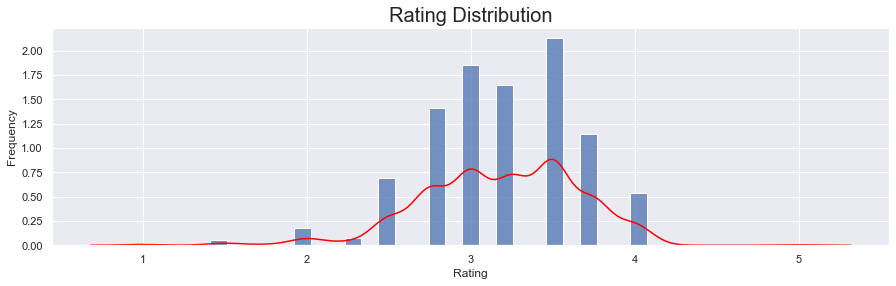

CompanyName
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


<Figure size 432x288 with 0 Axes>

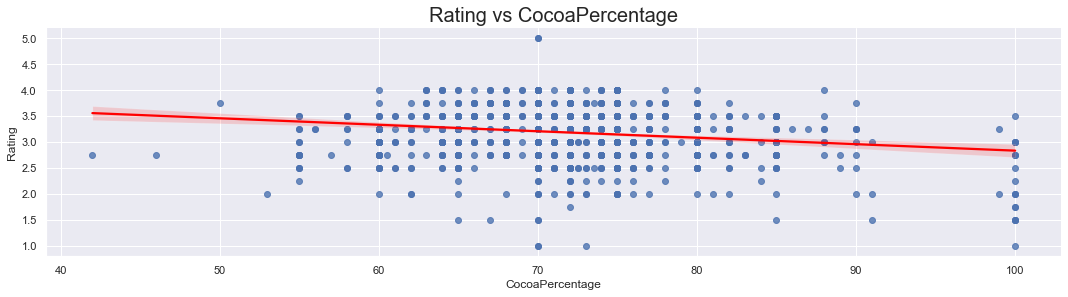

<Figure size 432x288 with 0 Axes>

In [9]:
# Ratings Histogram
plt.figure(figsize = (15, 4))
sns.histplot(ratings, stat = "density")
sns.kdeplot(ratings, color = "red")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating Distribution", fontsize = 20)
plt.show()
plt.clf()

# Getting average ratings of companies' chocolates and then finding top 10 companies
average_ratings_by_company_names = df.groupby(["CompanyName"])['Rating'].mean()
top_10 = average_ratings_by_company_names.nlargest(10)
print(top_10)

# Relation between Ratings and amount of cocoa
sns.lmplot(data = df, x = "CocoaPercentage", y = "Rating",
           height = 4, aspect = 15/4,
           line_kws={'color': 'red'})
plt.title("Rating vs CocoaPercentage", fontsize = 20)
plt.show()
plt.clf()

1. Ratings are highly concentrated between 2.5 and 4 there are some outliers at 1 and 5
2. Best chocolate company is: Tobago Estate (Pralus), with average rating of 4
3. By lmplot it can be concluded that amount of Cocoa is not the only factor which is affecting the ratings while most chocolatiers keeps their percentage of cocoa in between 60 to 85 we can see 100% cocoa percentage definitely doesn't provide very good ratings.